C:\Users\User\AppData\Local\Temp\ipykernel_18664\2487007763.py:20: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined['pct_change'] = combined['forecast'].pct_change() * 100


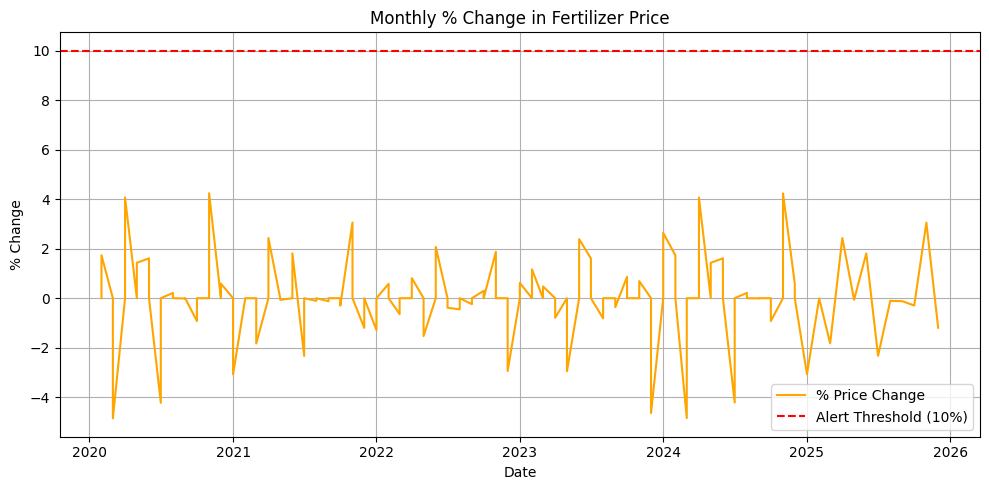

✅ Volatility and alert analysis complete. CSV + chart saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_csv("../data/cleaned/farm_input_prices_cleaned.csv", parse_dates=["date"])
forecast = pd.read_csv("../data/cleaned/fertilizer_price_forecast.csv", parse_dates=["ds"])
forecast.rename(columns={"ds": "date", "yhat": "forecast", "yhat_lower": "lower", "yhat_upper": "upper"}, inplace=True)
combined = pd.concat([
    df[['date', 'fertilizer_price']],
    forecast[['date', 'forecast']]
], axis=0).sort_values('date').reset_index(drop=True)
combined['volatility'] = combined['forecast'].rolling(window=3).std()

combined['pct_change'] = combined['forecast'].pct_change() * 100

combined['alert'] = combined['pct_change'].apply(lambda x: '🚨 High Jump' if x > 10 else '')

os.makedirs("../data/cleaned", exist_ok=True)
combined.to_csv("../data/cleaned/fertilizer_price_volatility_alerts.csv", index=False)

plt.figure(figsize=(10, 5))
plt.plot(combined['date'], combined['pct_change'], label="% Price Change", color='orange')
plt.axhline(10, color='red', linestyle='--', label="Alert Threshold (10%)")
plt.title("Monthly % Change in Fertilizer Price")
plt.xlabel("Date")
plt.ylabel("% Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/fertilizer_pct_change.png")
plt.show()

print("✅ Volatility and alert analysis complete. CSV + chart saved.")
